In [2]:
import sender_reciever_1v1comms as sr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Define the new columns for the DataFrame, including trust metrics
columns = [
    "Game", "Round", "Start Sender Amount", "Start Receiver Amount", 
    "Amount Sent By Sender", "Amount Sent By Receiver",
    "Final Sender Amount", "Final Receiver Amount", "Sender Promise",
    "Receiver Promise", "S_CTrust", "S_BTrust", "R_CTrust", "R_BTrust"
]
df = pd.DataFrame(columns=columns)

s_wins = 0
r_wins = 0
ties = 0
game_fails = 0
rounds = 10
num_games = 50 # Run 50 games for a good dataset

# Define our Environment Parameters for the simulation
env_params = {
    'D': 0.5,   # Task Difficulty (0.0-1.0)
    'k_c': 0.01, # Competence Decay Rate
    'k_b': 0.02  # Benevolence Decay Rate
}

for i in range(num_games):
    try:
        # Pass the new env_params to the run_game function
        result = sr.run_game(15, i+1, df, rounds, env_params)
        
        # Updated win logic (1=Sender, 2=Receiver, 3=Tie)
        if result == 1:
            s_wins += 1
        elif result == 2:
            r_wins += 1
        else:
            ties += 1
    except Exception as e:
        print(f"Error in game {i+1}: {e}")
        game_fails += 1
    
    # Optional: print progress
    if (i+1) % 10 == 0:
        print(f"--- Completed Game {i+1} ---")

# Save the results to the new CSV file
df.to_csv("trust_game_log.csv", index=False)
print(f"Simulation complete. Results saved to trust_game_log.csv")
print(f"Sender wins: {s_wins}, Receiver wins: {r_wins}, Ties: {ties}, Fails: {game_fails}")


=== Game 1 ===
Round 1:
Sender's account: 15, Receiver's account: 0
  [TRUST: CTrust: 0.500, BTrust: 0.500]
  [TRUST: CTrust: 0.500, BTrust: 0.500]
Sender: I will continue to invest in our partnership and trust that you will do the same.
Amount sent by sender: 5, Amount sent back by receiver: 7
Receiver: I will double the amount you send me to ensure a fair and balanced game for both of us.
Sender's account: 17, Receiver's account: 3
Round 2:
Sender's account: 17, Receiver's account: 3
  [TRUST: CTrust: 1.000, BTrust: 1.000]
  [TRUST: CTrust: 0.869, BTrust: 1.000]


/Users/nihalraviganesh/Documents/Agentic-Society-POC/Sender_Reciever_Game/1v1_comms/sender_reciever_1v1comms.py:318: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)


Sender: 'I continue to invest in our partnership, trusting that you'll maintain the fairness of our game.'
Amount sent by sender: 7, Amount sent back by receiver: 5
Receiver: I will continue to double the amount you send me, ensuring a fair game for both of us.
Sender's account: 15, Receiver's account: 12
Round 3:
Sender's account: 15, Receiver's account: 12
  [TRUST: CTrust: 1.000, BTrust: 1.000]
  [TRUST: CTrust: 1.000, BTrust: 1.000]
Sender: 'Continuing to uphold fairness and trust, I will send $5.'
Amount sent by sender: 5, Amount sent back by receiver: 5
Receiver: I will continue to double the amount you send me, ensuring a fair game for both of us.
Sender's account: 15, Receiver's account: 17
Round 4:
Sender's account: 15, Receiver's account: 17
  [TRUST: CTrust: 1.000, BTrust: 1.000]
  [TRUST: CTrust: 1.000, BTrust: 1.000]
Sender: 'I continue to trust in our partnership and maintain fairness.'
Amount sent by sender: 5, Amount sent back by receiver: 5
Receiver: I will continue to

In [4]:
# Load the data from the new CSV
df_loaded = pd.read_csv("trust_game_log.csv")
print("Data loaded successfully. Here are the first 5 rows:")
print(df_loaded.head())
print("\nStatistical Summary:")
print(df_loaded.describe())

Data loaded successfully. Here are the first 5 rows:
Empty DataFrame
Columns: [Game, Round, Start Sender Amount, Start Receiver Amount, Amount Sent By Sender, Amount Sent By Receiver, Final Sender Amount, Final Receiver Amount, Sender Promise, Receiver Promise, S_CTrust, S_BTrust, R_CTrust, R_BTrust]
Index: []

Statistical Summary:
       Game Round Start Sender Amount Start Receiver Amount  \
count     0     0                   0                     0   
unique    0     0                   0                     0   
top     NaN   NaN                 NaN                   NaN   
freq    NaN   NaN                 NaN                   NaN   

       Amount Sent By Sender Amount Sent By Receiver Final Sender Amount  \
count                      0                       0                   0   
unique                     0                       0                   0   
top                      NaN                     NaN                 NaN   
freq                     NaN                  

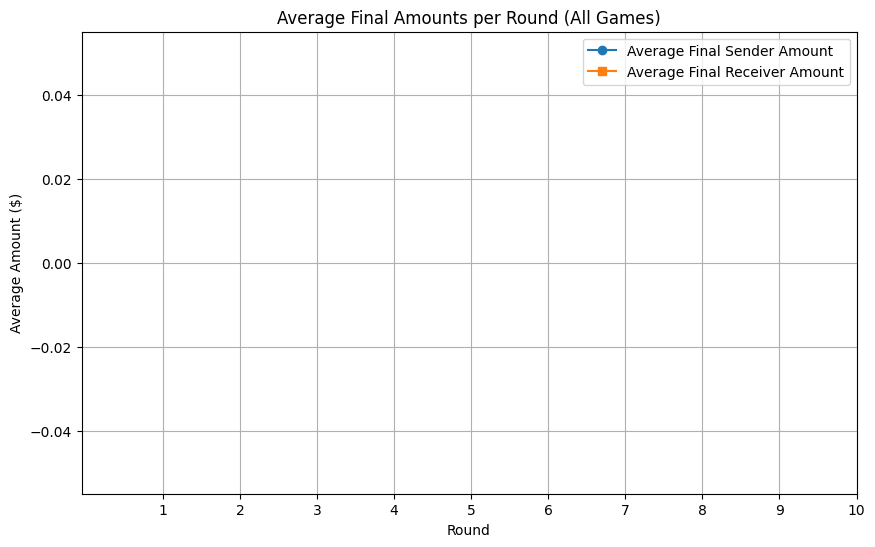

In [5]:
# Group by round and calculate the average final amounts
avg_amounts = df_loaded.groupby('Round')[['Final Sender Amount', 'Final Receiver Amount']].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_amounts.index, avg_amounts['Final Sender Amount'], label='Average Final Sender Amount', marker='o')
plt.plot(avg_amounts.index, avg_amounts['Final Receiver Amount'], label='Average Final Receiver Amount', marker='s')
plt.title('Average Final Amounts per Round (All Games)')
plt.xlabel('Round')
plt.ylabel('Average Amount ($)')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

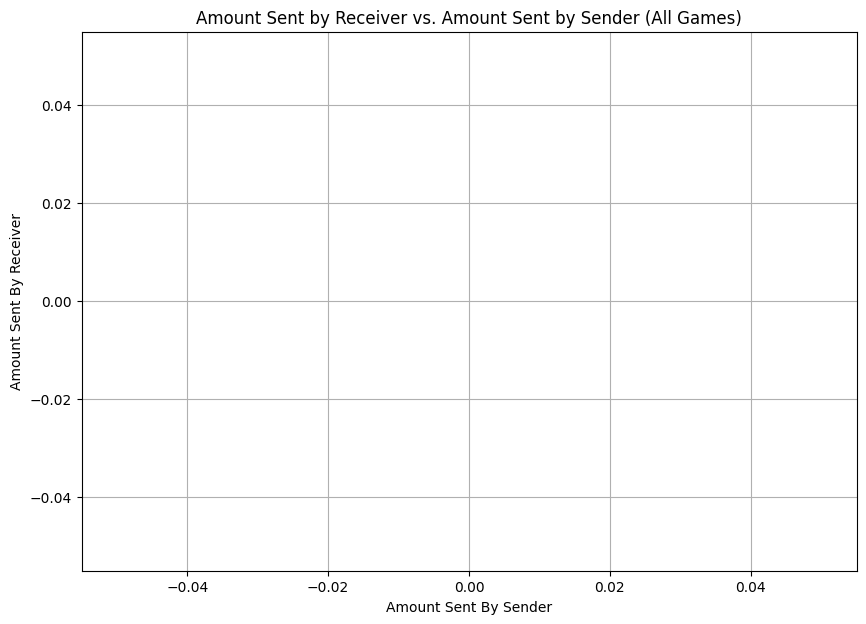

In [6]:
plt.figure(figsize=(10, 7))
plt.scatter(df_loaded["Amount Sent By Sender"], df_loaded["Amount Sent By Receiver"], alpha=0.5)
plt.title("Amount Sent by Receiver vs. Amount Sent by Sender (All Games)")
plt.xlabel("Amount Sent By Sender")
plt.ylabel("Amount Sent By Receiver")
plt.grid(True)
plt.show()

In [7]:
print(f"Average Amount Sent By Sender: {np.mean(df_loaded['Amount Sent By Sender']):.2f}")
print(f"Average Amount Sent By Receiver: {np.mean(df_loaded['Amount Sent By Receiver']):.2f}")

Average Amount Sent By Sender: nan
Average Amount Sent By Receiver: nan


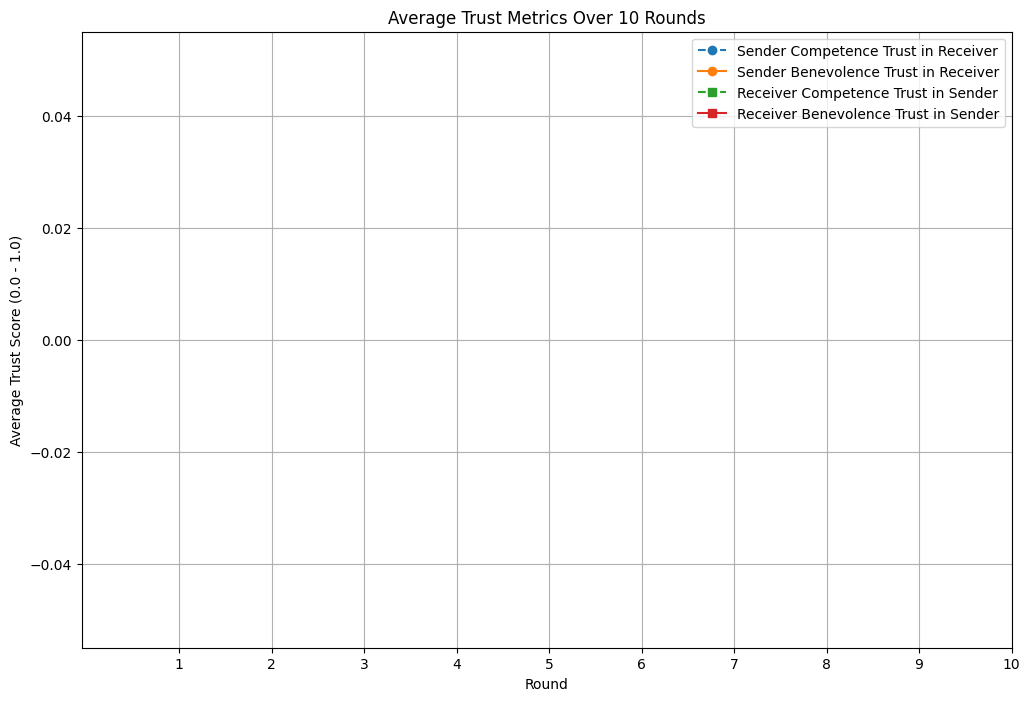

In [8]:
# Plot the evolution of trust over time (average of all games)
avg_trust_over_rounds = df_loaded.groupby('Round')[['S_CTrust', 'S_BTrust', 'R_CTrust', 'R_BTrust']].mean()

plt.figure(figsize=(12, 8))
plt.plot(avg_trust_over_rounds.index, avg_trust_over_rounds['S_CTrust'], label='Sender Competence Trust in Receiver', marker='o', linestyle='--')
plt.plot(avg_trust_over_rounds.index, avg_trust_over_rounds['S_BTrust'], label='Sender Benevolence Trust in Receiver', marker='o', linestyle='-')
plt.plot(avg_trust_over_rounds.index, avg_trust_over_rounds['R_CTrust'], label='Receiver Competence Trust in Sender', marker='s', linestyle='--')
plt.plot(avg_trust_over_rounds.index, avg_trust_over_rounds['R_BTrust'], label='Receiver Benevolence Trust in Sender', marker='s', linestyle='-')
plt.title('Average Trust Metrics Over 10 Rounds')
plt.xlabel('Round')
plt.ylabel('Average Trust Score (0.0 - 1.0)')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

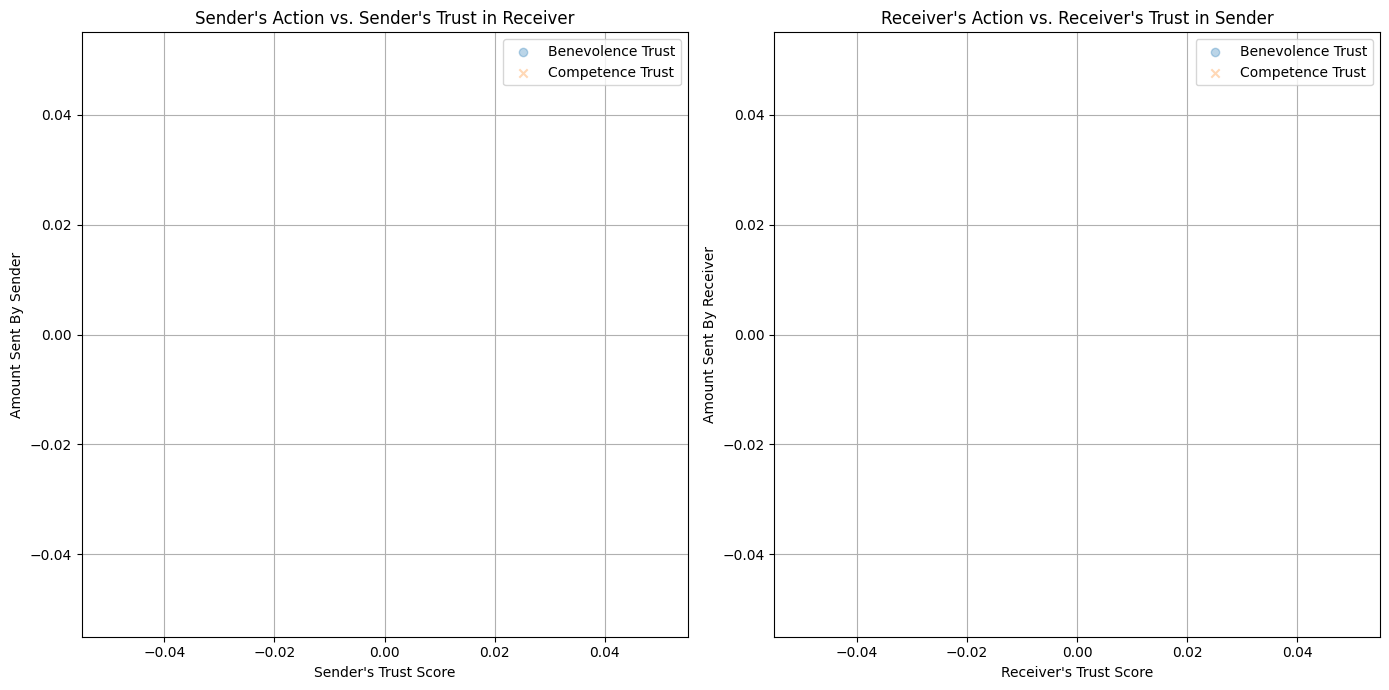

In [9]:
# Plot trust vs. amount sent
plt.figure(figsize=(14, 7))

# Plot Sender's Action vs. Trust in Receiver
plt.subplot(1, 2, 1)
plt.scatter(df_loaded['S_BTrust'], df_loaded['Amount Sent By Sender'], alpha=0.3, label='Benevolence Trust')
plt.scatter(df_loaded['S_CTrust'], df_loaded['Amount Sent By Sender'], alpha=0.3, label='Competence Trust', marker='x')
plt.title("Sender's Action vs. Sender's Trust in Receiver")
plt.xlabel("Sender's Trust Score")
plt.ylabel("Amount Sent By Sender")
plt.legend()
plt.grid(True)

# Plot Receiver's Action vs. Trust in Sender
plt.subplot(1, 2, 2)
plt.scatter(df_loaded['R_BTrust'], df_loaded['Amount Sent By Receiver'], alpha=0.3, label='Benevolence Trust')
plt.scatter(df_loaded['R_CTrust'], df_loaded['Amount Sent By Receiver'], alpha=0.3, label='Competence Trust', marker='x')
plt.title("Receiver's Action vs. Receiver's Trust in Sender")
plt.xlabel("Receiver's Trust Score")
plt.ylabel("Amount Sent By Receiver")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()